In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
X=np.array([[0,0],
[0.1,0.1],
[0.1,0.2],
[0.2,0.1],
[0.3,0.4],
[0.4,0.3],
[0.8,0],
[1.2,0],
[0,0.8],
[0,0.9],
[1,1],
[1.2,1.3]])

In [135]:
y=np.array([[0],
[0],
[0],
[0],
[0],
[0],
[1],
[1],
[1],
[1],
[1],
[1]])

In [6]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [7]:
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [138]:
i=0
out=np.array([0]*y.shape[0]).reshape(-1,1)

In [139]:
sum(np.rint(out)-y)

array([-6.])

In [147]:
while np.max(abs(np.rint(out)-y))!=0:
    w1=3*np.random.randn(2,6)
    w2=3*np.random.randn(6,1)
    b1=3*np.random.randn(1,6)
    b2=3*np.random.randn(1,1)
    out=sigmoid(tanh(X@w1+b1)@w2+b2)
    i=i+i

In [148]:
np.max(np.rint(out)-y)

0.0

In [253]:
colors=["red","blue"]

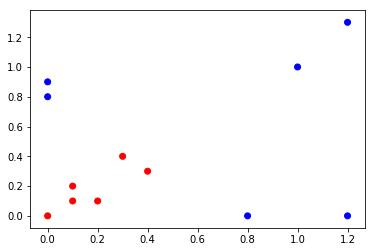

In [254]:
plt.scatter(X[:,0],X[:,1], color=np.array(colors)[y.reshape(-1)])

In [255]:
xs=(1.2*np.random.rand(1000000,2))

In [256]:
boundary=xs[np.where(abs(tanh(xs@w1+b1)@w2+b2)<.001)[0],:]

(-0.1, 1.5)

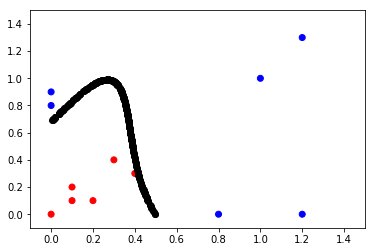

In [257]:
plt.scatter(X[:,0],X[:,1], color=np.array(colors)[y.reshape(-1)])
plt.scatter(boundary[:,0],boundary[:,1], color="black")
plt.ylim(-.1, 1.5)
plt.xlim(-0.1,1.5)

In [176]:
#Sort y based on probabilities
y_sort=y[np.argsort(out, axis=0)]

In [240]:
#Number of 1s and 0s in y
pos = sum(y_sort)
neg = sum(1-y_sort)

In [230]:
#Because y was sorted base on probabilities, the possible true negative counts 
#at each threshold are as follows
tn = np.cumsum(1-y_sort)
#Subtracting the true negatives from the total number of negatives give false positives
fpr = 1-tn/neg

In [231]:
#Total number of positives minus the number of positives at each threshold gives
#true positives at each threshold
tp = pos - np.cumsum(y_sort)

tpr = tp/pos

In [232]:
tpr=np.insert(tpr,0,1,axis=1)

In [233]:
fpr=np.insert(fpr,0,1,axis=1)

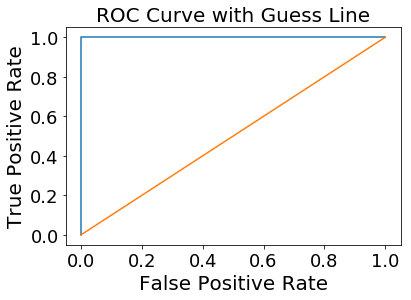

In [273]:
plt.plot(fpr[0,:],tpr[0,:])
plt.xticks(fontsize=18)
plt.xlabel("False Positive Rate",fontsize=20)
plt.yticks(fontsize=18)
plt.ylabel("True Positive Rate" ,fontsize=20)
plt.title("ROC Curve with Guess Line", fontsize=20)
plt.plot([0,1],[0,1])

In [239]:
auc=-.5*(np.sum(tpr[:,1:]*np.diff(fpr))+np.sum(tpr[:,:-1]*np.diff(fpr)))

In [266]:
auc

1.0